# **Regression Trees**

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Load the Data**

In [2]:
# Read the California housing data
df = pd.read_csv("D:\Coding\Datasets\housing.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Data Preprocessing**

In [3]:
# Apply one hot encoding on 'ocean_proximity' column
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


## **Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("median_house_value", axis=1),
                                                    df["median_house_value"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((14448, 12), (6192, 12))

## **Train a Decision Tree Regression Model**

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
# Instantiate a decision tree regressor object
dtr = DecisionTreeRegressor()

# Fit the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
# Predict the test data
y_pred = dtr.predict(X_test)

In [10]:
# Check the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [11]:
print("Cross Validation R2 Score:", 
      np.mean(cross_val_score(dtr, X_train, y_train, scoring="r2", cv=10)))

Cross Validation R2 Score: 0.58609655236247


## **Hyperparameter Tuning**

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Instantiate another decision tree regressor object
dtr2 = DecisionTreeRegressor()

In [14]:
# Create the parameters grid
dtr2_param_grid = {
    "max_depth": [2, 4, 8, 10, None],
    "criterion": ["absolute_error", "squared_error"],
    "min_samples_split": [4, 8, 10, 12, None],
    "min_samples_leaf": [1, 2, 4, 6, None],
    "max_features": [0.25, 0.5, 0.75, 1.0, None]
}

In [15]:
# Apply the GridSearchCV to find the best hyperparameters
dtr2_grid = GridSearchCV(estimator=dtr2,
                         param_grid=dtr2_param_grid,
                         scoring="r2",
                         n_jobs=-1,
                         cv=5,
                         verbose=2)

# Fit the training data
dtr2_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 0.75, 1.0, None],
                         'min_samples_leaf': [1, 2, 4, 6, None],
                         'min_samples_split': [4, 8, 10, 12, None]},
             scoring='r2', verbose=2)

In [16]:
# Print the best parameters
dtr2_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.75,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [17]:
# Print the best score
dtr2_grid.best_score_

0.6446231808309779

In [18]:
# Train the model with best parameters
dtr2 = dtr2_grid.best_estimator_
dtr2

DecisionTreeRegressor(max_features=0.75, min_samples_leaf=2,
                      min_samples_split=10)

## **Accuracy Assessment**

In [19]:
# Predict the test data
y_pred = dtr2.predict(X_test)

In [20]:
# Calculate the R2 Score
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.5970686515692395


## **Feature Importance**

In [21]:
# Extract the feature importance in a dataframe
feature_importance = pd.Series(dtr2.feature_importances_, index=X_train.columns)\
                       .sort_values(ascending=False)
feature_importance

median_income                 6.530698e+09
ocean_proximity_INLAND        8.847543e+08
housing_median_age            1.547379e+08
total_bedrooms                6.136562e+07
ocean_proximity_NEAR BAY      9.253960e+06
households                    7.212495e+06
population                    4.125914e+03
ocean_proximity_ISLAND        0.000000e+00
longitude                              NaN
latitude                               NaN
total_rooms                            NaN
ocean_proximity_NEAR OCEAN             NaN
dtype: float64

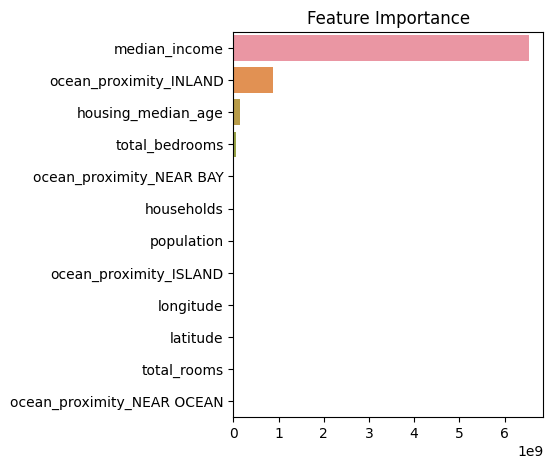

In [25]:
# Plot the feature importance
plt.figure(figsize=(4, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()